In [1]:
import numpy as np
from sklearn import preprocessing
import re
import os
import matplotlib.pyplot as plt
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA

In [2]:
enert= np.loadtxt('../feat_data/PBE0energies.txt', comments='#')
G= np.load('../feat_data/fbp_1175_2b_2_3_3b_5.npy')
g_st= preprocessing.MaxAbsScaler().fit_transform(G)
print '*********************'
print 'g_st ', g_st.shape
print 'enert ', enert.shape

pca = PCA(n_components=100)
g_st= pca.fit_transform(g_st)

*********************
g_st  (1000, 1175)
enert  (1000,)


In [3]:
#G_scaled= g_st[:20000,:]
#E=np.reshape(enert[:20000],(len(enert[:20000]),1))
G_scaled= g_st
E=np.reshape(enert,(len(enert),1))
print E.shape
print G_scaled.shape

mixer= np.array(range(G_scaled.shape[0]))
for _ in range(10000):
    np.random.shuffle(mixer)
n= int(len(mixer)*0.90) # marking the 90%
G_train_scaled= G_scaled[mixer[:n]]
G_vali_scaled= G_scaled[mixer[n:]]
E_train= E[mixer[:n]]
E_vali= E[mixer[n:]]
trai_id= mixer[:n]
vali_id= mixer[n:]
print 'G_train_scaled->', G_train_scaled.shape
print 'G_vali_scaled->', G_vali_scaled.shape
print 'E_train->', E_train.shape
print 'E_vali->', E_vali.shape

(1000, 1)
(1000, 100)
G_train_scaled-> (900, 100)
G_vali_scaled-> (100, 100)
E_train-> (900, 1)
E_vali-> (100, 1)


In [4]:
#params = {'n_estimators': 700, 'max_depth': 5, 'min_samples_split': 10,
#          'learning_rate': 0.08090, 'loss': 'ls', 'min_samples_leaf':10} #mse vali 1958.7833, trai 0.0309
#params = {'n_estimators': 600, 'max_depth': 3, 'min_samples_split': 6,
#          'learning_rate': 0.090, 'loss': 'ls', 'min_samples_leaf':6} #mse vali 1612.5797, trai 26.2255
params = {'n_estimators': 500, 'max_depth': 2, 'min_samples_split': 4,
          'learning_rate': 0.0950, 'loss': 'ls', 'min_samples_leaf':4} #mse vali 1612.5797, trai 26.2255
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(G_train_scaled, E_train)
mse = mean_squared_error(E_vali, clf.predict(G_vali_scaled))
print("MSE: %.4f" % mse)

/home/accounts/zeledon/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MSE: 1753.5636


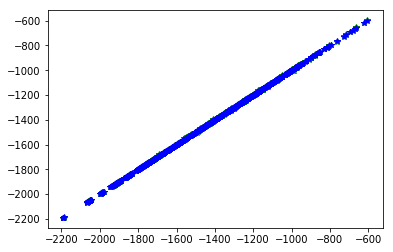

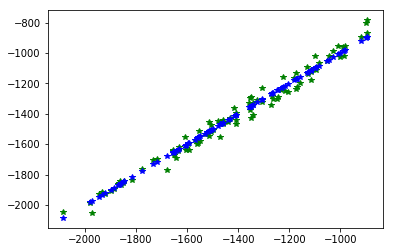

MSE: 9.7355


In [12]:
Ebr_vali= clf.predict(G_vali_scaled)

Ebr_train= clf.predict(G_train_scaled)

plt.plot(Ebr_train, np.squeeze(E_train), '*g', Ebr_train, Ebr_train, '*b')
plt.show()

plt.plot(Ebr_vali, np.squeeze(E_vali), '*g', Ebr_vali, Ebr_vali, '*b')
plt.show()

mse = mean_squared_error(E_train, clf.predict(G_train_scaled))
print("MSE: %.4f" % mse)

In [5]:
print E_vali.shape
E_vali1d= np.squeeze(E_vali)

(100, 1)


In [6]:
E_b= clf.predict(G_vali_scaled)
print E_b.shape

(100,)


In [7]:
print np.average(np.abs(np.subtract(E_vali1d, E_b)))

31.8250433378


144.19859232
0.0614917301748
37.4339032007


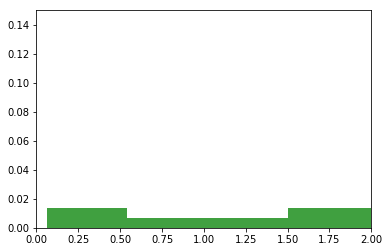

In [14]:
diff_vali= np.abs(np.subtract(Ebr_vali, np.squeeze(E_vali)))
print np.max(diff_vali)
print np.min(diff_vali)
diff_vali_aver= np.average(diff_vali)
print diff_vali_aver

n, bins, patches = plt.hist(diff_vali, 300, facecolor='g', alpha=0.75)
plt.axis([0.0, 2.0, 0, 0.15])
for item in patches:
    item.set_height(item.get_height()/sum(n))
plt.show()

In [65]:
np.save('../analysis/diff_vali_grad_bost_X_oni_48', diff_vali)

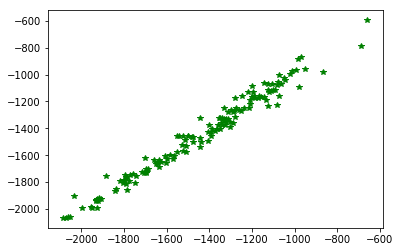

In [15]:
plt.plot(Ebr_vali, np.squeeze(E_vali), '*g')
plt.show()